In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
def plot_var(xinf,taux,y_range=[-150,101],col='k',label=''):
    n = 1113
    if y_range[0] < 0 or np.diff(map(np.log10,y_range)) < 3:
        y = np.linspace(y_range[0],y_range[1],n)
        var_name = 'Voltage (mV)'
        mode = 'lin'
    else:
        y = np.logspace(np.log10(y_range[0]),np.log10(y_range[1]),n)
        var_name = 'Calcium (mM)'
        mode = 'log'
    plt.subplot(2,1,1)
    if mode == 'lin':
        plt.plot(y,xinf(y),color=col,lw=1)
    else:
        plt.semilogx(y,xinf(y),color=col,lw=1)
    plt.ylabel(r'$x_\infty$')
    plt.subplot(2,1,2)
    if mode == 'lin':
        plt.plot(y,taux(y),color=col,lw=1,label=label)
    else:
        plt.semilogx(y,taux(y),color=col,lw=1,label=label)
    plt.xlabel(var_name)
    plt.ylabel(r'$\tau$ (ms)')

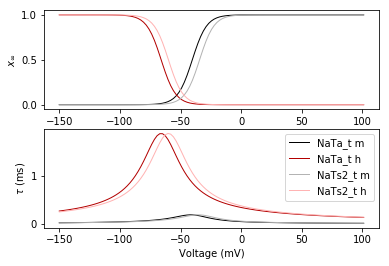

In [91]:
# NaTa_t: transient sodium current, used in the axon
# I = m^3 * h * (V-ENa)
qt = 2.3**((34.-21.)/10.)
ma_NaTa_t = lambda v: (0.182 * (v- -38.))/(1.-(np.exp(-(v- -38.)/6.)))
mb_NaTa_t = lambda v: (0.124 * (-v -38.))/(1.-(np.exp(-(-v -38.)/6.)))
minf_NaTa_t = lambda v: ma_NaTa_t(v)/(ma_NaTa_t(v) + mb_NaTa_t(v))
taum_NaTa_t = lambda v: (1/(ma_NaTa_t(v) + mb_NaTa_t(v)))/qt
ha_NaTa_t = lambda v: (-0.015 * (v- -66.))/(1-(np.exp((v- -66.)/6.)))
hb_NaTa_t = lambda v: (-0.015 * (-v -66.))/(1-(np.exp((-v -66.)/6.)))
hinf_NaTa_t = lambda v: ha_NaTa_t(v)/(ha_NaTa_t(v) + hb_NaTa_t(v))
tauh_NaTa_t = lambda v: (1/(ha_NaTa_t(v) + hb_NaTa_t(v)))/qt
plot_var(minf_NaTa_t,taum_NaTa_t,col=[0,0,0],label='NaTa_t m')
plot_var(hinf_NaTa_t,tauh_NaTa_t,col=[.7,0,0],label='NaTa_t h')

# NaTs2_t: transient sodium current, used in the soma and in the apical dendrite
# Identical dynamics as NaTa_t, but shifted by +6 mV
# I = m^3 * h * (V-ENa)
qt = 2.3**((34.-21.)/10.)
ma_NaTs2_t = lambda v: (0.182 * (v- -32.))/(1.-(np.exp(-(v- -32.)/6.)))
mb_NaTs2_t = lambda v: (0.124 * (-v -32.))/(1.-(np.exp(-(-v -32.)/6.)))
minf_NaTs2_t = lambda v: ma_NaTs2_t(v)/(ma_NaTs2_t(v) + mb_NaTs2_t(v))
taum_NaTs2_t = lambda v: (1/(ma_NaTs2_t(v) + mb_NaTs2_t(v)))/qt
ha_NaTs2_t = lambda v: (-0.015 * (v- -60.))/(1-(np.exp((v- -60.)/6.)))
hb_NaTs2_t = lambda v: (-0.015 * (-v -60.))/(1-(np.exp((-v -60.)/6.)))
hinf_NaTs2_t = lambda v: ha_NaTs2_t(v)/(ha_NaTs2_t(v) + hb_NaTs2_t(v))
tauh_NaTs2_t = lambda v: (1/(ha_NaTs2_t(v) + hb_NaTs2_t(v)))/qt
plot_var(minf_NaTs2_t,taum_NaTs2_t,col=[.7,.7,.7],label='NaTs2_t m')
plot_var(hinf_NaTs2_t,tauh_NaTs2_t,col=[1,.7,.7],label='NaTs2_t h')
plt.legend(loc='best'),
plt.show()

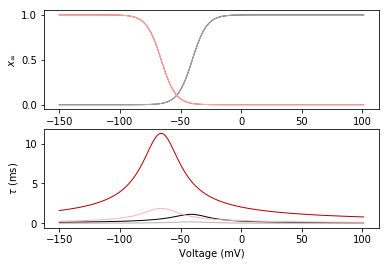

In [93]:
# Nap_Et2: persistent sodium current, used in the axon
# Identical dynamics as NaTa_t, but time constants are 6x larger
# I = m^3 * h * (V-ENa)
qt = 2.3**((34.-21.)/10.)
ma_Nap_Et2 = lambda v: (0.182 * (v- -38.))/(1.-(np.exp(-(v- -38.)/6.)))
mb_Nap_Et2 = lambda v: (0.124 * (-v -38.))/(1.-(np.exp(-(-v -38.)/6.)))
minf_Nap_Et2 = lambda v: ma_Nap_Et2(v)/(ma_Nap_Et2(v) + mb_Nap_Et2(v))
taum_Nap_Et2 = lambda v: 6 * (1/(ma_Nap_Et2(v) + mb_Nap_Et2(v)))/qt
ha_Nap_Et2 = lambda v: (-0.015 * (v- -66.))/(1-(np.exp((v- -66.)/6.)))
hb_Nap_Et2 = lambda v: (-0.015 * (-v -66.))/(1-(np.exp((-v -66.)/6.)))
hinf_Nap_Et2 = lambda v: ha_Nap_Et2(v)/(ha_Nap_Et2(v) + hb_Nap_Et2(v))
tauh_Nap_Et2 = lambda v: 6 * (1/(ha_Nap_Et2(v) + hb_Nap_Et2(v)))/qt
plot_var(minf_Nap_Et2,taum_Nap_Et2,col=[0,0,0],label='Nap_Et2 m')
plot_var(hinf_Nap_Et2,tauh_Nap_Et2,col=[.7,0,0],label='Nap_Et2 h')
plot_var(minf_NaTa_t,taum_NaTa_t,col=[.7,.7,.7],label='NaTa_t m')
plot_var(hinf_NaTa_t,tauh_NaTa_t,col=[1,.7,.7],label='NaTa_t h')
plt.show()

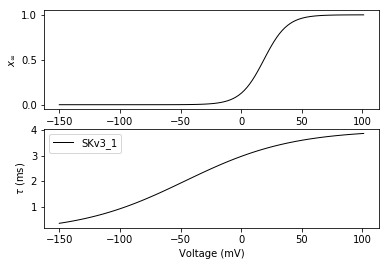

In [130]:
# SKv3_1: Shaw-related potassium channel, used everywhere except in the basal dendrites
# I = gbar * m * (V-EK)
minf_SKv3_1 = lambda v: 1. / (1.+np.exp(((v -(18.7))/(-9.7))))
taum_SKv3_1 = lambda v: 0.2*20./(1+np.exp(((v -(-46.56))/(-44.14))))
plot_var(minf_SKv3_1,taum_SKv3_1,label='SKv3_1')
plt.legend(loc='best')
plt.show()

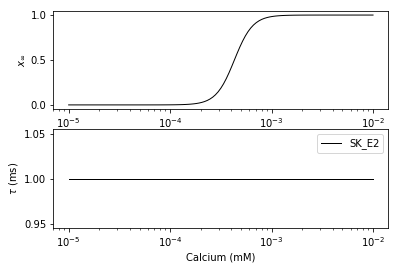

In [129]:
# SK_E2: calcium-activated potassium current, used in the soma and in the axon
# I = gbar * z * (V-EK)
tauz_SK_E2 = lambda ca: ca/ca # = 1 [ms]
zinf_SK_E2 = lambda ca: 1. /(1. + (0.00043 / ca)**4.8)
plot_var(zinf_SK_E2,tauz_SK_E2,y_range=[1e-5,1e-2],label='SK_E2')
plt.legend(loc='best')
plt.show()

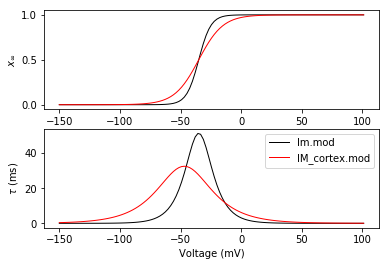

In [152]:
# Im: muscarinic potassium current
# I = gbar * m * (V-EK)
### Im.mod
qt = 2.3**((34.-21.)/10.)
ma_Im = lambda v: 3.3e-3*np.exp(2.5*0.04*(v - -35.))
mb_Im = lambda v: 3.3e-3*np.exp(-2.5*0.04*(v - -35.))
minf_Im = lambda v: ma_Im(v)/(ma_Im(v) + mb_Im(v))
taum_Im = lambda v: (1./(ma_Im(v) + mb_Im(v)))/qt
### IM_cortex.mod

minf_im = lambda v: 1. / (1. + np.exp(-(v+35.)/10))
taumax = 100. # [ms]
celsius = 34.
tadj = tadj = 2.3**((celsius-36.)/10)
tau_peak = taumax / tadj
taum_im = lambda v: tau_peak / ( 3.3 * np.exp((v+35.)/20.) + np.exp(-(v+35.)/20.))
                            
plot_var(minf_Im,taum_Im,col=[0,0,0],label='Im.mod')
plot_var(minf_im,taum_im,col=[1,0,0],label='IM_cortex.mod')
plt.legend()
plt.show()

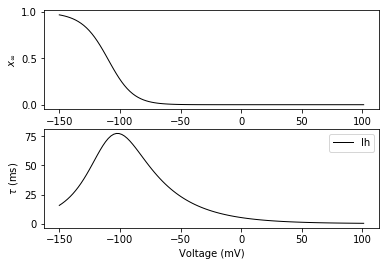

In [131]:
# Ih: hyperpolarization-activated cation current, used in the soma and dendrites
# I = gbar * m * (V+45)
ma_Ih = lambda v: 0.001*6.43*(v+154.9)/(np.exp((v+154.9)/11.9)-1.)
mb_Ih = lambda v: 0.001*193*np.exp(v/33.1)
minf_Ih = lambda v: ma_Ih(v)/(ma_Ih(v) + mb_Ih(v))
taum_Ih = lambda v: 1./(ma_Ih(v) + mb_Ih(v))
plot_var(minf_Ih,taum_Ih,col=[0,0,0],label='Ih')
plt.legend()
plt.show()

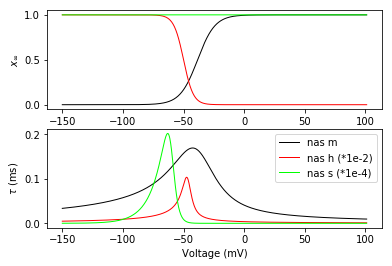

In [178]:
# constants
q10 = 2.
celsius = 34.
qt = q10**((celsius-24)/10)
tha = -30 # [mV]
ar = 1 # [1]
sh = 0. # [mV]
sha = 0. # [mV]
a2 = ar
sh2 = sh
sha2 = sha
Ra = 0.4 # [/ms]
qa = 7.2 # [mV]
Rb = 0.124 # [/ms]
thi1 = -45 # [mV]
Rd = .03 # [/ms]
qd = 1.5 # [mV]
thi2 = -45 # [mV]
Rg = 0.01 # [/ms]
qg = 1.5 # [mV]
vvh = -58. # [mV]
vvs = 2. # [mV]
zetas = 12. # [1]
vhalfs = -60. # [mV]
gms = 0.2 # [1]
thinf = -50. # [mV]
qinf = 4. # [mV]
a0s = 0.0003 # [ms]

def trap0(v,th,a,q):
    y = a*q*np.ones(v.shape)
    idx, = np.where(np.abs(v-th)>1e-6)
    y[idx] = a * (v[idx]-th) / (1-np.exp(-(v[idx]-th)/q))
    return y
    
alpv = lambda v: 1./(1.+np.exp((v-vvh-sh)/vvs))
alps = lambda v: np.exp(1e-3*zetas*(v-vhalfs-sh)*9.648e4/(8.315*(273.16+celsius)))
bets = lambda v: np.exp(1e-3*zetas*gms*(v-vhalfs-sh)*9.648e4/(8.315*(273.16+celsius)))

ma_nas = lambda v: trap0(v,tha+sh2+sha2,Ra,qa)
mb_nas = lambda v: trap0(-v,-tha-sh2-sha2,Rb,qa)
taum_nas = lambda v: 1./(ma_nas(v)+mb_nas(v))/qt
minf_nas = lambda v: ma_nas(v)/(ma_nas(v)+mb_nas(v))
ha_nas = lambda v: trap0(v,thi1+sh2,Rd,qd)
hb_nas = lambda v: trap0(-v,-thi2-sh2,Rg,qg)
tauh_nas = lambda v: 1./(ha_nas(v)+hb_nas(v))/qt * 1e-2
hinf_nas = lambda v: 1./(1+np.exp((v-thinf-sh2)/qinf))
sinf_nas = lambda v: alpv(v)+a2*(1-alpv(v))
taus_nas = lambda v: bets(v)/(a0s*(1+alps(v))) * 1e-4

plot_var(minf_nas,taum_nas,col=[0,0,0],label='nas m')
plot_var(hinf_nas,tauh_nas,col=[1,0,0],label='nas h (*1e-2)')
plot_var(sinf_nas,taus_nas,col=[0,1,0],label='nas s (*1e-4)')
plt.legend()
plt.show()